In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('global_laptop_selling_data.xlsx')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Dataset Analysis

In [4]:
df.shape

(1303, 13)

In [5]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [8]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [9]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [10]:
df.corr(numeric_only=True)

,laptop_ID,Inches,Price_euros
laptop_ID,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


# Data Visualization

Text(0.5, 1.0, 'Price_euros')

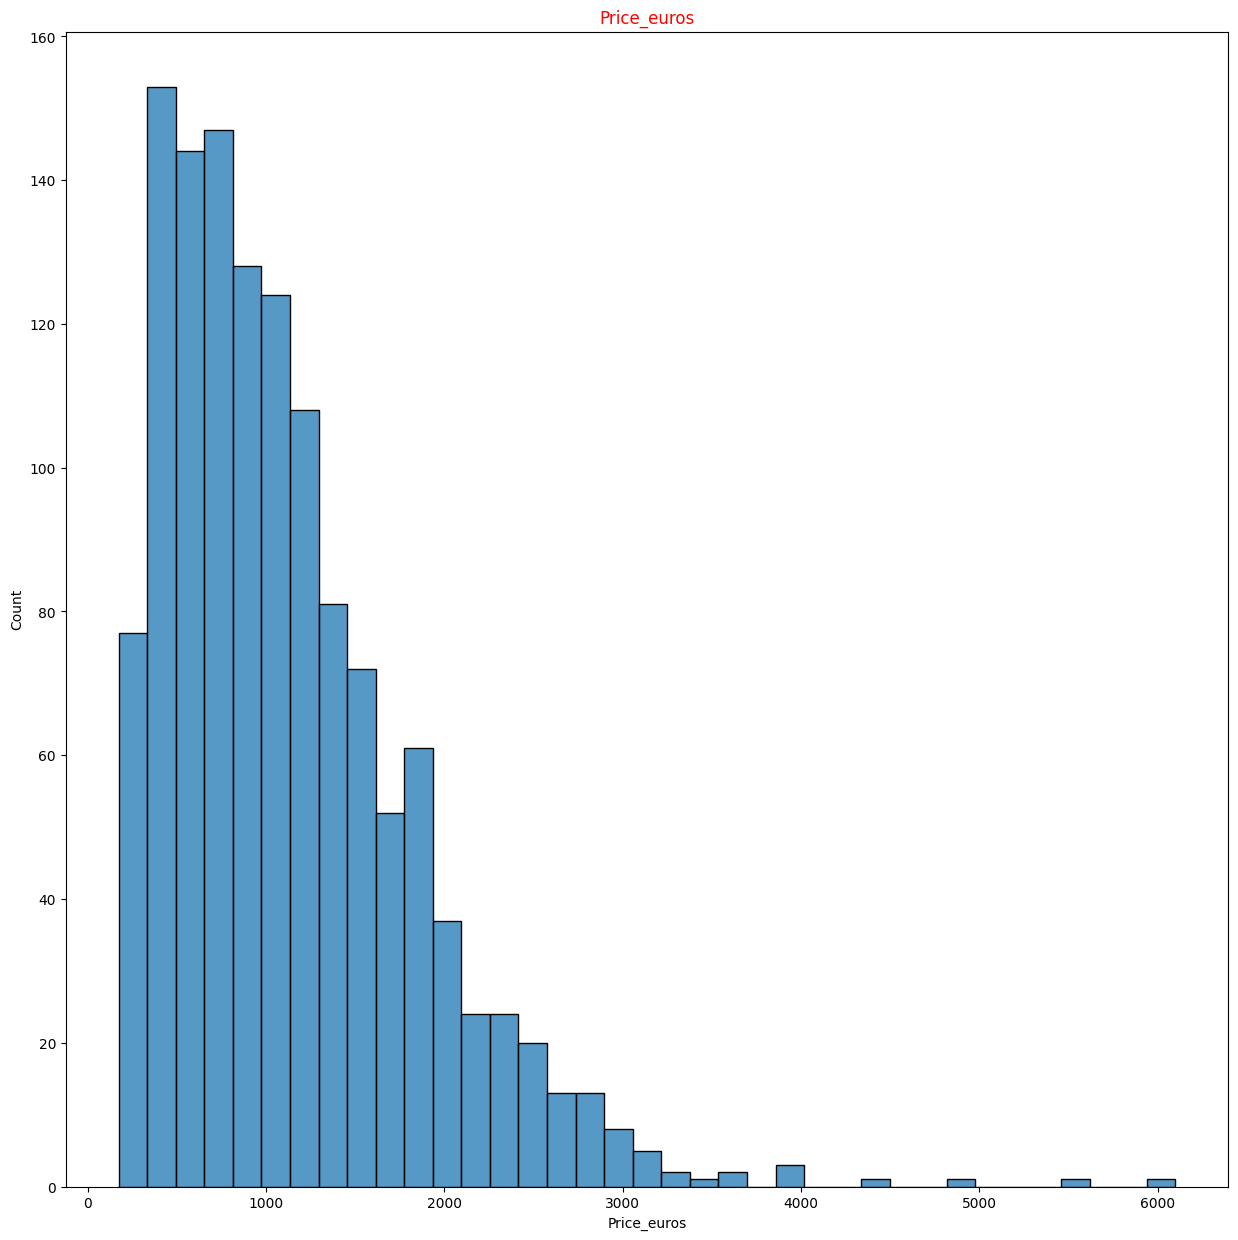

In [11]:
plt.figure(figsize=(15,15))
sb.histplot(df['Price_euros'])
plt.title('Price_euros',color='red')

<Axes: >

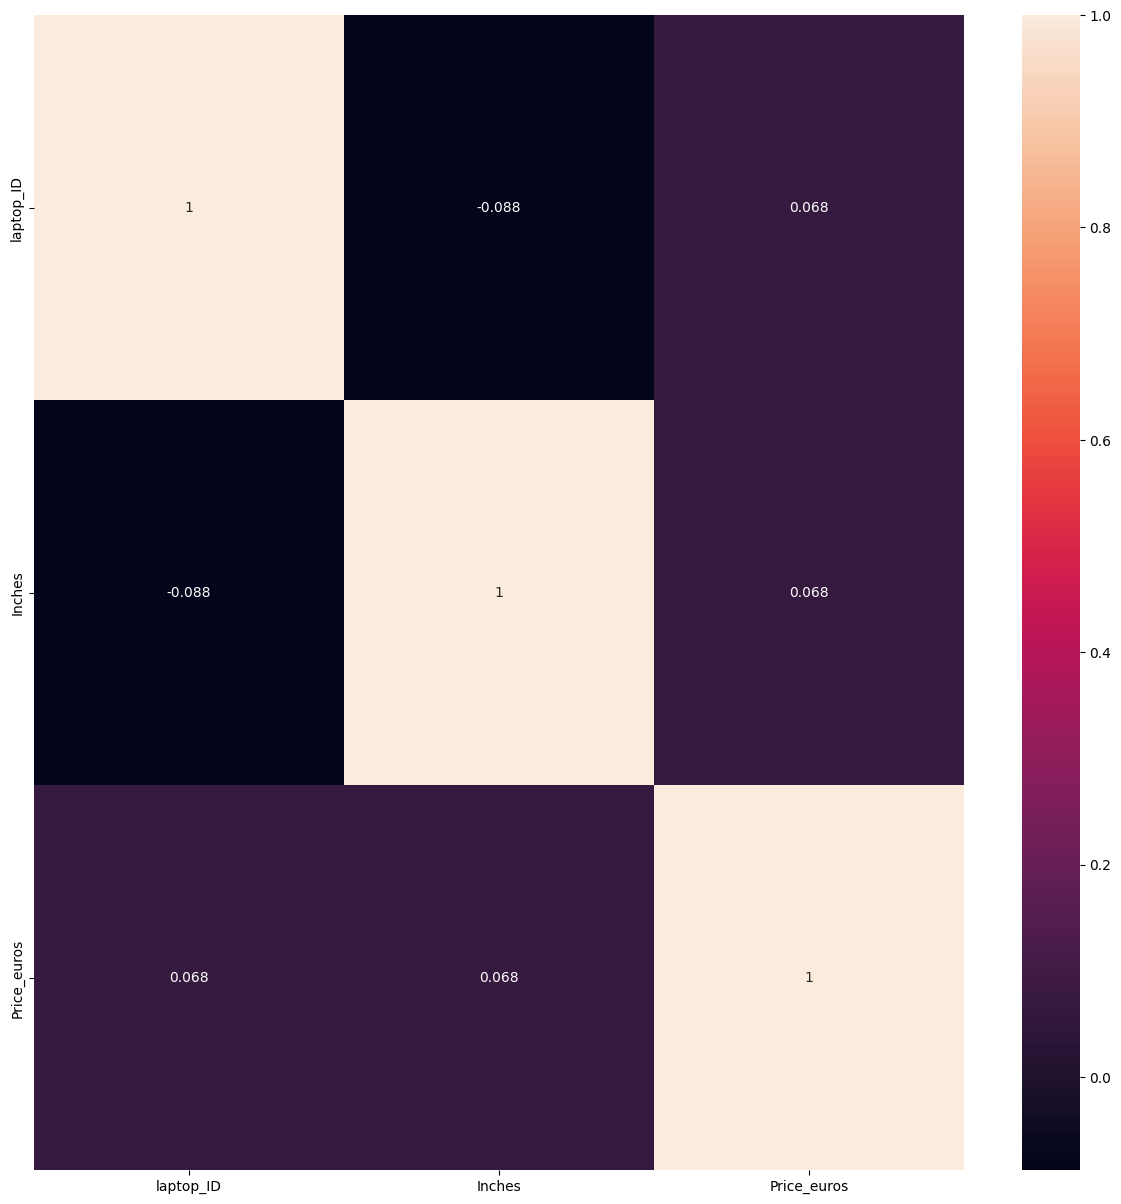

In [12]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr(numeric_only=True),annot=True)

Text(0.5, 1.0, 'Company VS Price_euros')

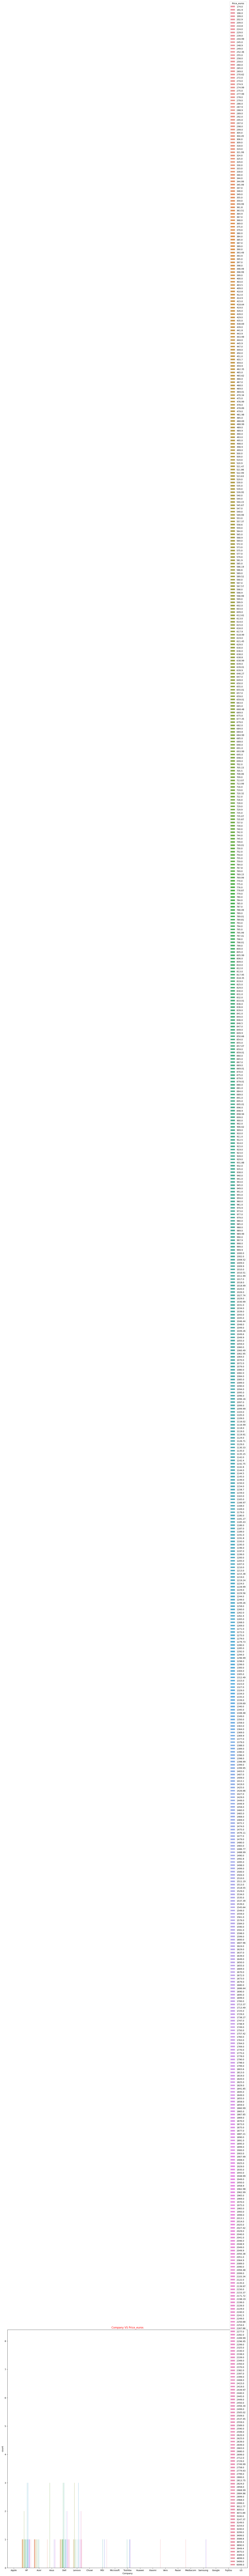

In [13]:
plt.figure(figsize=(20,20))
sb.countplot(x='Company',hue='Price_euros',data=df)
plt.title('Company VS Price_euros',color='red')

# Data Preprocessing

In [14]:
df.shape

(1303, 13)

In [15]:
df.dropna(inplace=True)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(1303, 13)

# Encoding Features

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
from pandas.core.dtypes.common import is_numeric_dtype

In [21]:
for i in df.columns:
    if is_numeric_dtype(df[i]):
        continue
    else:
        df[i]=le.fit_transform(df[i])

In [22]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,300,4,13.3,23,65,8,4,56,8,38,1339.69
1,2,1,301,4,13.3,1,63,8,2,50,8,35,898.94
2,3,7,50,3,15.6,8,74,8,16,52,4,74,575.00
3,4,1,300,4,15.4,25,85,1,29,8,8,71,2537.45
4,5,1,300,4,13.3,23,67,8,16,57,8,38,1803.60


# Split Dataset

In [23]:
x=df.drop(['laptop_ID','Price_euros'],axis=1)

In [24]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,300,4,13.3,23,65,8,4,56,8,38
1,1,301,4,13.3,1,63,8,2,50,8,35
2,7,50,3,15.6,8,74,8,16,52,4,74
3,1,300,4,15.4,25,85,1,29,8,8,71
4,1,300,4,13.3,23,67,8,16,57,8,38


In [25]:
y=df[['Price_euros']]

In [26]:
y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


# Train the Dataset

In [27]:
from sklearn.model_selection import train_test_split as tts

In [28]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=44)

In [29]:
xtrain.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
478,4,240,3,15.6,8,83,8,10,5,5,113
1066,2,380,1,17.3,15,93,6,12,88,5,161
562,7,108,4,13.3,19,47,1,29,45,5,17
503,10,205,3,14.0,0,37,5,26,42,5,105
266,2,600,0,13.3,7,106,8,34,59,5,21


In [30]:
xtest.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
494,2,389,1,17.3,13,92,2,18,86,5,170
1275,2,602,4,13.3,15,45,8,29,45,5,32
715,10,476,3,14.0,15,74,8,16,64,5,75
772,16,436,3,14.0,9,68,5,4,46,5,66
1206,7,25,3,15.6,0,74,8,16,52,5,80


In [31]:
ytest.head()

,Price_euros
494,1269.00
1275,729.00
715,857.07
772,1020.00
1206,579.00


# Using Regression Algorithm

# Multivariable Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg=LinearRegression()

In [34]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [35]:
pred=reg.predict(xtest)
pred

array([[1704.58952124],
       [ 926.40898425],
       [1174.4316029 ],
       [ 966.31638617],
       [ 890.87114439],
       [1117.56422617],
       [ 686.99737106],
       [1139.27608362],
       [1662.4966886 ],
       [1047.52317713],
       [ 457.92914354],
       [1331.4638117 ],
       [ 567.66596556],
       [ 956.66426669],
       [1809.84199707],
       [1646.06310626],
       [1039.5841644 ],
       [1046.77785394],
       [1235.6699963 ],
       [1810.1522039 ],
       [1101.07898556],
       [1816.15681546],
       [ 941.04464748],
       [1052.0929114 ],
       [1386.79868288],
       [ 118.32936543],
       [ 955.50466092],
       [1551.62735337],
       [1051.07974129],
       [2266.91634575],
       [ 612.8413887 ],
       [ 905.31882208],
       [1001.75553489],
       [1615.73000158],
       [1707.01504969],
       [1779.85478355],
       [ 731.16621304],
       [1275.51629541],
       [ 968.45484332],
       [1864.05442431],
       [1743.28456654],
       [1172.619

In [36]:
Linear_accuracy=r2_score(ytest,pred)
Linear_accuracy

0.4493283944176586

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
tr=DecisionTreeRegressor()

In [39]:
tr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [40]:
pred=tr.predict(xtest)
pred

array([2663.  ,  729.  , 1345.  ,  915.  ,  618.99, 1465.  ,  800.  ,
       1089.  , 1340.  , 1089.  , 1695.  , 1292.  ,  469.01,  889.  ,
       2267.86, 3240.  ,  819.  ,  941.  , 1189.  , 2029.  , 1650.  ,
       1749.  , 1499.  , 1472.2 ,  720.32,  489.  ,  577.  , 1009.  ,
        369.  , 3299.  ,  469.01,  985.  , 1377.  , 2226.  , 2499.  ,
       1845.  ,  659.  , 1142.8 , 1399.  , 2397.  , 1799.  , 1149.  ,
       1049.6 ,  498.9 ,  657.  ,  719.  , 1950.  ,  409.  , 1890.  ,
        659.  ,  832.  , 1900.  , 1590.  ,  363.51, 2122.  , 2199.  ,
        403.  ,  439.  , 1099.  ,  646.27, 1829.  , 2339.  , 1279.  ,
        899.  ,  769.15,  468.  ,  749.  ,  465.62,  489.  ,  739.  ,
       1545.64,  819.  ,  529.  ,  639.  , 1258.  ,  547.  , 2419.  ,
        955.  ,  795.  , 2884.86, 1799.  ,  689.  ,  695.  , 2397.  ,
        398.  ,  943.  ,  585.  , 1189.  ,  839.  ,  286.  ,  258.  ,
       2094.48, 1499.  ,  889.  ,  369.  ,  379.  ,  569.  ,  675.  ,
        900.  , 1345

In [41]:
tree_accuracy=tr.score(xtest,ytest)
print("Accuracy of Decision Tree:",tree_accuracy)

Accuracy of Decision Tree: 0.7875282368167978


# K-NN Regression

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
kn=KNeighborsRegressor()

In [44]:
kn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [45]:
knn_accuracy=kn.score(xtest,ytest)
print("Accuracy of K-NN Regression:",knn_accuracy)

Accuracy of K-NN Regression: 0.6697671463006443


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf=RandomForestRegressor()

In [48]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [49]:
Randomf_accuracy=rf.score(xtest,ytest)
print("Accuracy of Random Forest:",Randomf_accuracy)

Accuracy of Random Forest: 0.8611875588590433


# Hyper Parameter tuning(using in Random Forest)

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
tree=np.random.randint(15,150,30)

In [52]:
tree

array([127,  46, 130, 121,  34,  31,  78,  61,  44,  67,  44, 115, 145,
       104,  31, 128, 138, 110,  47,  54,  65, 108,  77,  91,  23,  21,
        60,  92, 110,  91])

In [53]:
max_features=['sqrt', 'log2'] 
max_depth=np.random.randint(2,12,50)
criterion = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
min_samples_split = [2,3,4]

grid = {
    
    'n_estimators' : tree,
    'criterion' : criterion,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
    
}

In [54]:
print(grid)

{'n_estimators': array([127,  46, 130, 121,  34,  31,  78,  61,  44,  67,  44, 115, 145,
       104,  31, 128, 138, 110,  47,  54,  65, 108,  77,  91,  23,  21,
        60,  92, 110,  91]), 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 'max_features': ['sqrt', 'log2'], 'max_depth': array([11, 11,  3,  2,  9,  7,  2,  9,  5,  7, 10,  9,  7,  8, 10,  3, 10,
        9,  2,  7,  8,  7,  9, 11,  3,  2,  7, 10, 11,  4,  8, 11, 10,  9,
        5,  2, 10,  2, 10,  3,  9,  5,  9, 11,  8,  6, 10,  2,  5, 10]), 'min_samples_split': [2, 3, 4]}


In [55]:
rcv=RandomizedSearchCV(rf,grid,n_iter=100,cv=3)

In [56]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': array([11, 11,  3,  2,  9,  7,  2,  9,  5,  7, 10,  9,  7,  8, 10,  3, 10,
        9,  2,  7,  8,  7,  9, 11,  3,  2,  7, 10, 11,  4,  8, 11, 10,  9,
        5,  2, 10,  2, 10,  3,  9,  5,  9, 11,  8,  6, 10,  2,  5, 10]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([127,  46, 130, 121,  34,  31,  78,  61,  44,  67,  44, 115, 145,
       104,  31, 128, 138, 110,  47,  54,  65, 108,  77,  91,  23,  21,
        60,  92, 110,  91])})

In [57]:
rcv.best_score_

0.7885555572540165

In [58]:
rcv.best_params_

{'n_estimators': 78,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 11,
 'criterion': 'poisson'}

# Creating Data Frame and Barplot

In [59]:
data={'Name':['Accuracy of Multivariable Linear Regression','Accuracy of Decision Tree','Accuracy of K-NN Regression',
             'Accuracy of Random Forest'],'Accuracy':[Linear_accuracy,tree_accuracy,knn_accuracy,Randomf_accuracy]}

In [60]:
df_after_prediction=pd.DataFrame(data=data)

In [61]:
df_after_prediction.head()

,Name,Accuracy
0,Accuracy of Multivariable Linear Regression,0.449328
1,Accuracy of Decision Tree,0.787528
2,Accuracy of K-NN Regression,0.669767
3,Accuracy of Random Forest,0.861188


<Axes: xlabel='Accuracy', ylabel='Name'>

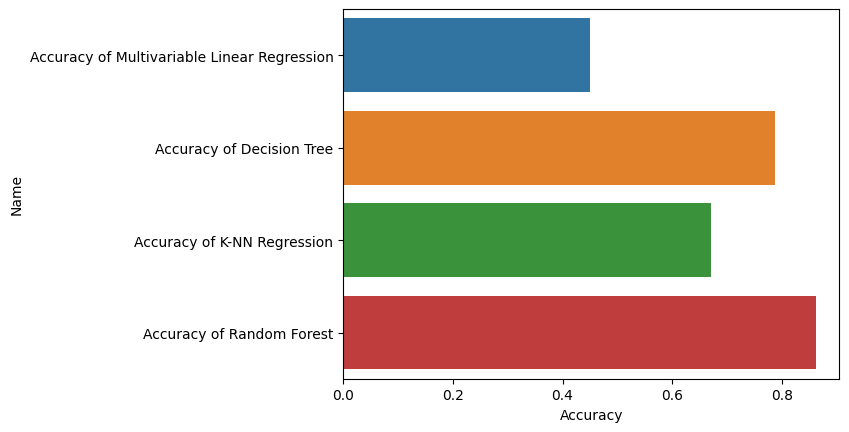

In [62]:
sb.barplot(x='Accuracy',y='Name',data=df_after_prediction)

# Save the model

In [63]:
import joblib as jb

In [64]:
jb.dump(rf,'Laptop_Selling')

['Laptop_Selling']

In [65]:
rf2=jb.load('Laptop_Selling')

In [66]:
rf2.predict([[2,602,4,13.3,15,45,8,29,45,5,32]])

array([815.772])

# Create Interface

In [67]:
import gradio as gr

In [68]:
def price_fun(Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight):
    price=rf2.predict([[Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight]])
    return price

In [69]:
price_fun(2,602,4,13.3,15,45,8,29,45,5,32)

array([815.772])

In [70]:
interface=gr.Interface(
   fn=price_fun,
   inputs=['number','number','number','number','number','number','number','number','number','number','number'],
    outputs=['number']

).launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://572bb692d4c18496ad.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
